In [1]:
import zipfile
import os

def unzip_file(zip_filepath, extract_to):
    """
    Unzips a zip file to a specified directory.

    :param zip_filepath: Path to the zip file.
    :param extract_to: Directory where the contents should be extracted.
    """
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print(f'Unzipped {zip_filepath} to {extract_to}')

# Example usage
zip_filepath = './test.zip'
extract_to = 'test'
unzip_file(zip_filepath, extract_to)


Unzipped ./test.zip to test


In [ ]:
zip_filepath = './train.zip'
extract_to = 'tarin'
unzip_file(zip_filepath, extract_to)

In [14]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Directory containing images
train_dir = './train_images'

# Parameters
target_size = (100, 100)
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Save the model
model.save('animal_species_predictor.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 17354 images belonging to 74 classes.
Found 4304 images belonging to 74 classes.


C:\Users\Bounasla Yasmine\AppData\Local\Temp\ipykernel_6612\2565485041.py:43: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


Epoch 1/10


C:\Users\Bounasla Yasmine\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


542/542 ━━━━━━━━━━━━━━━━━━━━ 266s 469ms/step - accuracy: 0.2327 - loss: 3.4590 - val_accuracy: 0.3832 - val_loss: 2.4199
Epoch 2/10
  1/542 ━━━━━━━━━━━━━━━━━━━━ 2:38 292ms/step - accuracy: 0.2500 - loss: 2.8125

c:\Program Files\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.2500 - loss: 2.8125 - val_accuracy: 0.1250 - val_loss: 2.9650
Epoch 3/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 191s 352ms/step - accuracy: 0.3580 - loss: 2.4871 - val_accuracy: 0.4072 - val_loss: 2.2787
Epoch 4/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.2812 - loss: 2.8021 - val_accuracy: 0.3750 - val_loss: 2.5031
Epoch 5/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 186s 342ms/step - accuracy: 0.3757 - loss: 2.3654 - val_accuracy: 0.4160 - val_loss: 2.2319
Epoch 6/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.3750 - loss: 1.9073 - val_accuracy: 0.5000 - val_loss: 2.1879
Epoch 7/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 185s 341ms/step - accuracy: 0.4025 - loss: 2.2737 - val_accuracy: 0.4268 - val_loss: 2.2033
Epoch 8/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.3125 - loss: 2.2414 - val_accuracy: 0.4375 - val_loss: 2.0644
Epoch 9/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 181s 334ms/step - accuracy: 0.4154 - loss: 2.2156 - val

135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.4896 - loss: 2.0331
Test Accuracy: 48.98%


In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Directory containing images
train_dir = './train'

# Parameters
target_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split data into training and validation
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Fine-tuning
for layer in base_model.layers[-100:]:  # Unfreeze the last 100 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Save the model
model.save('animal_species_predictor.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 17354 images belonging to 74 classes.
Found 4304 images belonging to 74 classes.
Epoch 1/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 964s 2s/step - accuracy: 0.4682 - loss: 2.2621 - val_accuracy: 0.6712 - val_loss: 1.1879
Epoch 2/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6562 - loss: 1.0052 - val_accuracy: 0.5000 - val_loss: 1.9360
Epoch 3/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 915s 2s/step - accuracy: 0.6505 - loss: 1.2411 - val_accuracy: 0.6672 - val_loss: 1.1393
Epoch 4/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 0.9299 - val_accuracy: 0.3750 - val_loss: 2.1862
Epoch 5/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 909s 2s/step - accuracy: 0.6794 - loss: 1.1179 - val_accuracy: 0.6777 - val_loss: 1.1376
Epoch 6/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 1.2101 - val_accuracy: 0.7500 - val_loss: 0.7388
Epoch 7/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.6854 - loss: 1.0745 - val_accuracy: 0.7036 - val_loss: 1.0359
Epoch 8/10
54

135/135 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7368 - loss: 0.9356
Test Accuracy: 73.44%


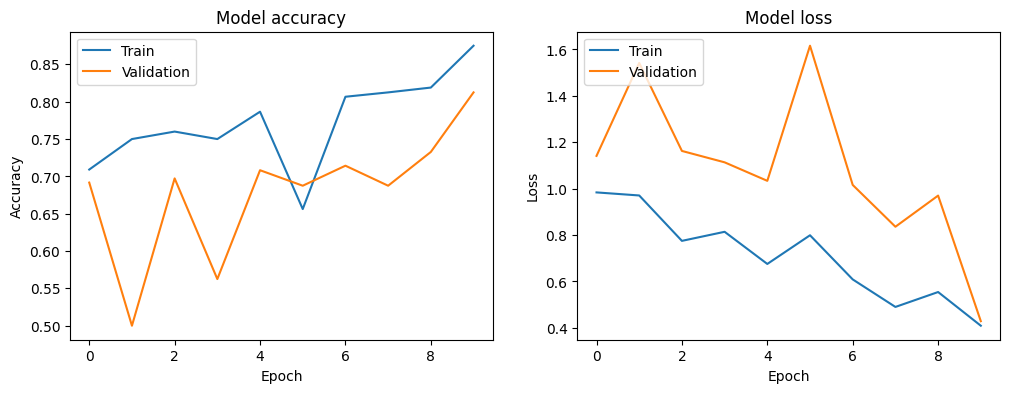

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Redefine necessary variables
train_dir = './train'
target_size = (224, 224)
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split data into training and validation
)

# Access class indices from the training generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
class_indices = train_generator.class_indices

# Load the saved model
model = load_model('animal_species_predictor.keras', compile=False)

# Function to preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Predict on a new image
img_path = './OIP.jpg'  # Replace with your image path
img = preprocess_image(img_path)
predictions = model.predict(img)
predicted_index = np.argmax(predictions, axis=1)[0]

# Create a reverse mapping
index_to_class = {v: k for k, v in class_indices.items()}

# Get the predicted class label
predicted_class_label = index_to_class[predicted_index]

print(f"this animal is a {predicted_class_label}")


Found 17354 images belonging to 74 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
this animal is a Brown bear
